# 📚 Import Necessary Libraries

In this section, we import all the essential libraries for our image classification project 🧠. These include tools for:

- File and image handling (`os`, `cv2`, `keras.preprocessing.image`) 🖼️
- Data processing (`numpy`, `random`, `train_test_split`) 🔢
- Model creation and training using Keras and TensorFlow 🤖
- Pre-trained model loading (VGG16) for transfer learning 🧩
- Plot the accuracy 📉 using graph

In [1]:
# For interacting with the operating system (like reading directories)
import os  

# For loading and Preprocessing images
from keras.preprocessing import image  
import cv2

# For randomization operations
import random

# For randomization  array/matrix operations
import numpy as np

# To split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# To perform real-time data augmentation on image during training
from tensorflow.keras.preprocessing.image import ImageDataGenerator

 # Pre-trained VGG16 model from Keras applications
from keras.applications.vgg16 import VGG16  

# To defind a custom classification model on top of VGG16
from keras import Sequential
from keras.layers import Dense

# To load previously saved model
from tensorflow.keras.models import load_model   

# 📊 Import the required library
import matplotlib.pyplot as plt

This setup is typically used in **image classification projects** that leverage transfer learning with the **VGG16 model**.

# 🏷️ List of Different Categories

This line defines a list named `categories` containing two class labels: `'with_mask'` and `'without_mask'`. 😷🚫

These represent the two target classes for our image classification task — distinguishing between people **wearing masks** and those **not wearing masks**.

In [2]:
# Define the two categories for classification: people with masks and without masks
categories = ['with_mask', 'without_mask']

# 🖼️📂 Load, Resize, and Label Images

1. Loop through each category folder in 'Train_Data',
2. load each image using OpenCV 🧠,
3. resize it to 224x224 📏 (for VGG16 compatibility),
4. assign a label 🔢 based on the category,
5.  and store the image-label pair in the 'data' list 💾.

In [3]:
# Initialize an empty list to store image data and labels
data = []

# Loop through each category
for category in categories:
    # Construct the path to the images for this category
    path = os.path.join('Train_Data', category)

    # Assign a numerical label based on the index in the categories list
    label = categories.index(category)

    # Iterate over each file in the category directory
    for file in os.listdir(path):
        img_path = os.path.join(path, file)
        
        # Load the image using OpenCV
        img = cv2.imread(img_path)

        # Skip the image if loading fails
        if img is None:
            print(f"Warning: Failed to load {img_path}")
            continue
        
        # Resize the image to 224x224 pixels (VGG16 input size)
        img = cv2.resize(img, (224, 224))
        
        # Append the image and its label as a pair to the data list
        data.append([img, label])

In [4]:
# Total Number of Data
len(data)

1507

In [5]:
# Count number of images in each category
with_mask_count = sum(1 for _, label in data if label == 0)
without_mask_count = sum(1 for _, label in data if label == 1)

print(f"Total 'with_mask' images: {with_mask_count}")
print(f"Total 'without_mask' images: {without_mask_count}")

Total 'with_mask' images: 755
Total 'without_mask' images: 752


In [6]:
# Shuffle the Data to remove bias
random.shuffle(data)

# 🧮 Split Data into Features and Labels

Here, we separate the loaded image data into two lists — one for features (images) and one for labels (categories) 🔢🖼️. This step prepares our data for training the model.


In [7]:
# Initialize empty lists for storing image data (x) and labels (y)
x = []
y = []

# Loop through each image-label pair in the 'data' list
for features, label in data:
    x.append(features)  # Add image data to x
    y.append(label)     # Add label to y

# 🔄 Convert Data to NumPy Arrays

We convert the feature (`x`) and label (`y`) lists into NumPy arrays.  
This allows for faster computations and compatibility with machine learning models 🚀📊.

In [8]:
# Transform the feature and label lists into NumPy arrays
# to enable efficient numerical operations and model training
x = np.array(x)
y = np.array(y)

In [9]:
# 📐 Show shape of feature data
x.shape

(1507, 224, 224, 3)

In [10]:
# 🔢 Show shape of label data
y.shape

(1507,)

In [11]:
y   # 🏷️ Display label array

array([1, 1, 0, ..., 1, 0, 0])

# 🧪 Normalize the feature data

In [12]:
# Scale pixel values to the range [0, 1] by dividing by 255
x = x / 255

# ✂️ Split the Train and Test Data

We split the dataset into training and testing sets using an 80-20 ratio.  
This helps in evaluating the model's performance on unseen data 🧪📊.

In [13]:
# Split the data into training and testing sets
# 80% for training and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [14]:
x_train.shape   # 📏 Check shape of training feature data

(1205, 224, 224, 3)

In [15]:
x_test.shape   # 📏 Check shape of testing feature data

(302, 224, 224, 3)

# 🧪 Data Augmentation

To improve the model's ability to generalize, we apply data augmentation to the training images.  
This includes random transformations like rotation, shifting, shearing, zooming, and flipping 🔄🔁.

For the validation data, we don't apply augmentation — it remains unchanged to ensure a fair evaluation of the model's performance 📊.

In [16]:
# Apply data augmentation to the training set to improve model generalization
train_datagen = ImageDataGenerator(
    rotation_range=20,          # Randomly rotate images by up to 20 degrees 🔄
    width_shift_range=0.1,      # Shift images horizontally by 10% ↔️
    height_shift_range=0.1,     # Shift images vertically by 10% ↕️
    shear_range=0.1,            # Apply shear transformations 🔃
    zoom_range=0.2,             # Randomly zoom in on images 🔍
    horizontal_flip=True,       # Randomly flip images horizontally ↔️
    fill_mode='nearest'         # Fill in missing pixels after transformations
)

# No augmentation for validation data — just rescaling if needed
val_datagen = ImageDataGenerator()

# 🔄 Create Data Generators

We use the `ImageDataGenerator.flow()` method to create data generators for training and validation:

- `train_generator` yields batches of augmented training images to help improve generalization 🏋️‍♂️  
- `val_generator` yields batches of validation images without augmentation for accurate evaluation 🧪

In [17]:
train_generator = train_datagen.flow(x_train, y_train, batch_size=32)  # 🏋️‍♂️ Augmented training data
val_generator = val_datagen.flow(x_test, y_test, batch_size=32)        # 🧪 Plain validation data

# 🧠 Pretrained 16-layer VGG16 Model

We load the VGG16 model, a deep convolutional neural network pre-trained on the ImageNet dataset.  
This model will serve as the base for transfer learning to classify our mask dataset 🎯📊.

In [18]:
# Pretrained 16-layer Model
vgg = VGG16()
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

# 🏗️ Define CNN Model

We initialize a new Sequential model using Keras.  
This will allow us to stack layers on top of the pre-trained VGG16 model to customize it for our mask classification task 🧱🤖.

In [19]:
# Define CNN Model
model = Sequential()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# 🔄 Transfer Layers from VGG16

We copy all layers from the pre-trained VGG16 model **except the final classification layer**.  
This allows us to reuse the learned features while customizing the output layer for our specific task 🎯🧠.

In [20]:
# Remove last layer of the model VGG16 and add CNN Model 
for layer in vgg.layers[:-1]:
    model.add(layer)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc2 (Dense)                          │ (None, 4096)                │      16,781,312 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

# 🧊 Freeze All Layers in the CNN Model

We freeze all the layers in the model to prevent them from being updated during training.  
This ensures we retain the pre-trained weights of VGG16 and only train the new classification layer ❄️🔒.

In [21]:
# Freeze all layers in the CNN Model
for layer in model.layers:
    layer.trainable= False

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc2 (Dense)                          │ (None, 4096)                │      16,781,312 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 134,260,544 (512.16 MB)

# 🎯 Add Output Layer for Binary Classification

We add a `Dense` layer with 1 neuron and a `sigmoid` activation function.  
This is suitable for binary classification tasks like distinguishing between masked and unmasked faces 😷🚫.

In [22]:
# For binary classification
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc2 (Dense)                          │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,264,641 (512.18 MB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 134,260,544 (512.16 MB)

# ⚙️ Compile the Model

We compile the model using the **Adam** optimizer and **binary cross-entropy** loss function,  
which are ideal choices for binary classification. We also track **accuracy** as our evaluation metric 📊✅.

In [23]:
# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 🏋️‍♂️ Train the Model

We train the model for **10 epochs** using the training data generator.  
The model's performance is evaluated on the validation set after each epoch to monitor accuracy and loss 📈🧪.

In [24]:
# Train the Model
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

C:\Users\sudes\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 137s 4s/step - accuracy: 0.6649 - loss: 0.6239 - val_accuracy: 0.7881 - val_loss: 0.4033
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 127s 3s/step - accuracy: 0.8840 - loss: 0.3671 - val_accuracy: 0.9603 - val_loss: 0.2166
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 131s 3s/step - accuracy: 0.9206 - loss: 0.2689 - val_accuracy: 0.9768 - val_loss: 0.1669
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 128s 3s/step - accuracy: 0.9343 - loss: 0.2318 - val_accuracy: 0.9503 - val_loss: 0.1680
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 134s 4s/step - accuracy: 0.9430 - loss: 0.2073 - val_accuracy: 0.9768 - val_loss: 0.1223
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - accuracy: 0.9536 - loss: 0.1729 - val_accuracy: 0.9868 - val_loss: 0.1054
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - accuracy: 0.9519 - loss: 0.1556 - val_accuracy: 0.9801 - val_loss: 0.0973
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 114s 3s/step - accuracy: 0.9590 - loss: 0.1354 - val_accuracy: 0.9834 - v

# 💾 Save and Load the Trained Model

We save the trained model to a `.keras` file for future use.  
Later, we can load it back using `load_model()` to make predictions or continue training without retraining from scratch 💡🔁.

In [25]:
model.save('face_mask_detector_model.keras') # save the trained model
model = load_model('face_mask_detector_model.keras')  # works perfectly

# 📊 Model Evaluation

In this step, we are evaluating our trained model on unseen validation data 📈.  
We are checking two important metrics:
- **Loss** ❌ (how far off the predictions are)
- **Accuracy** ✅ (how many predictions are correct)

This helps us understand if our model is **performing well** or **needs improvement**! 🚀  

In [26]:
# Evaluate the model on validation data
loss, accuracy = model.evaluate(val_generator)

# Print the Validation Accuracy in percentage
print(f"Validation Accuracy: {accuracy*100:.2f}%")

10/10 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9901 - loss: 0.0723
Validation Accuracy: 99.34%


# 📈 Plotting Model Accuracy Over Epochs

In this step, we are visualizing how the model's **accuracy** changed during training 🏋️‍♂️ and validation 📋.

- **Training Accuracy** ✅ ➔ How well the model is learning the training data.
- **Validation Accuracy** 🧪 ➔ How well the model performs on unseen validation data.

This graph helps us detect:
- **Overfitting** (if validation accuracy drops while training accuracy increases 📉)
- **Underfitting** (if both are low 📉)

Let's plot and analyze! 🔍

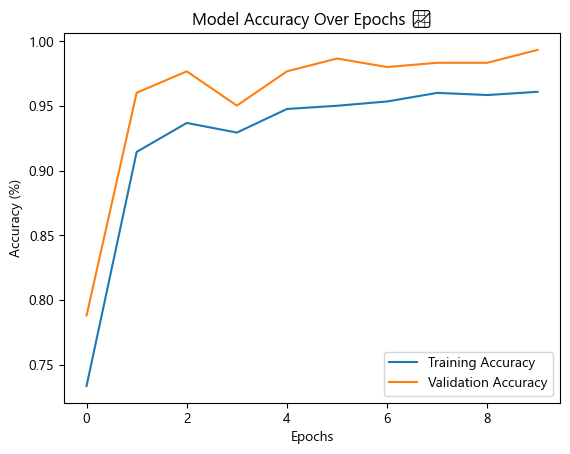

In [27]:
# Set font to one that supports emojis
plt.rcParams['font.family'] = 'Segoe UI Emoji'  # Windows
# Or for Linux: plt.rcParams['font.family'] = 'Noto Color Emoji'

# Now plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs 📈')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 🕵️‍♂️ Face Mask Detection Function

This function takes an image as input, reshapes it to the required format, and normalizes pixel values.  
It then uses the trained model to predict whether the person is wearing a mask (`0`) or not (`1`) 😷🚫.

In [28]:
def detect_face_mask(img):
    # Reshape and normalize the input image
    img = img.reshape(1, 224, 224, 3) / 255.0
    
    # Predict using the trained model
    y_pred = model.predict(img)
    
    # Convert the prediction to binary label (0 or 1)
    label = int(y_pred[0][0] > 0.5)
    
    return label

# 🖍️ Draw Label on Image

This function displays a label with a colored background on an image using OpenCV.  
It draws a filled rectangle behind the text for better visibility and overlays the label text at the specified position ✍️🎨.

In [29]:
def draw_label(img, text, pos, bg_color):
    # Get the size of the text to be displayed
    text_size = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 1, cv2.FILLED)

    # Calculate coordinates for the background rectangle
    end_x = pos[0] + text_size[0][0] + 2
    end_y = pos[1] + text_size[0][1] - 2

    # Draw the filled rectangle as background
    cv2.rectangle(img, pos, (end_x, end_y), bg_color, cv2.FILLED)

    # Put the text label on top of the rectangle
    cv2.putText(img, text, pos, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 1, cv2.LINE_AA)

# 👤 Face Detection Using Mediapipe and Haar Cascades

This function detects faces in an image using either **Mediapipe** or **Haar cascades**:

- If `use_mediapipe=True`, it tries to use **Mediapipe Face Detection** for better accuracy 🧠🔍.
- If Mediapipe is unavailable or not used, it falls back to **Haar cascades** to detect either **frontal** or **profile** faces 📷.

It returns a list of bounding boxes for the detected faces.

In [30]:
# Load Haar cascade classifiers for detecting frontal and profile faces
frontal_haar = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
profile_haar = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_profileface.xml')

# Define a function to detect faces using either Mediapipe or Haar cascades
def detect_faces_multi(img, use_mediapipe=False):
    faces = []

    # Try using Mediapipe if enabled and available
    if use_mediapipe:
        try:
            import mediapipe as mp
            mp_face = mp.solutions.face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.5)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            results = mp_face.process(img_rgb)

            if results.detections:
                for det in results.detections:
                    bbox = det.location_data.relative_bounding_box
                    h, w, _ = img.shape
                    x = int(bbox.xmin * w)
                    y = int(bbox.ymin * h)
                    width = int(bbox.width * w)
                    height = int(bbox.height * h)
                    faces.append((x, y, width, height))
                return faces
        except ImportError:
            print("Mediapipe not installed, skipping...")

    # Fallback to Haar frontal face detection
    faces = frontal_haar.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5)
    if len(faces) > 0:
        return faces

    # If no frontal face is found, use profile face detection
    faces = profile_haar.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5)
    return faces

# 🎥🧠 Access Webcam Feed and Real-Time Face Mask Detection

We use `cv2.VideoCapture(0)` to access the default webcam.  
This allows us to capture real-time video frames for mask detection 📸🧠.

The live video is processed frame-by-frame to detect faces and predict mask usage:

- Each frame is resized and passed to the trained model to check for mask presence 😷❌
- Faces are detected using Mediapipe (or Haar cascades as a fallback) 🧑‍💻📷
- Bounding boxes are drawn around detected faces and a label ("Mask" or "No Mask") is displayed based on the prediction
- Press **'x'** to stop the detection loop and close the webcam window 📸🛑


In [31]:
cap = cv2.VideoCapture(0)   # Access Webcam Feed
while True:
    # Capture frame from webcam
    ret, frame = cap.read()
    if not ret:
        break

    # Resize frame to match model input size
    img = cv2.resize(frame, (224, 224))

    # Predict mask presence
    y_pred = detect_face_mask(img)

    # Convert frame to grayscale for Haar detection (not used here but kept for compatibility)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces using Mediapipe (falls back to Haar if needed)
    coods = detect_faces_multi(frame, use_mediapipe=True)

    # Draw bounding boxes around detected faces
    for x, y, w, h in coods:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Draw label based on prediction
    if y_pred == 0:
        draw_label(frame, "Mask", (50, 50), (0, 255, 0))     # Green for Mask
    else:
        draw_label(frame, "No Mask", (50, 50), (0, 0, 255))  # Red for No Mask

    # Display the frame
    cv2.imshow("window", frame)

    # Exit loop when 'x' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('x'):
        break

# Release resources
cap.release()

cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
Mediapipe not installed, skipping...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
Mediapipe not installed, skipping...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
Mediapipe not installed, skipping...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
Mediapipe not installed, skipping...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
Mediapipe not installed, skipping...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
Mediapipe not installed, skipping...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
Mediapipe not installed, skipping...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
Mediapipe not installed, skipping...


# 🧪 Test on a Sample Image

We read a sample image from the `sample/` directory and resize it to 224x224 pixels.  
Then, we use the `detect_face_mask()` function to predict whether the person in the image is wearing a mask or not 😷🤖.

In [35]:
def show_and_predict(image_path):

    # Read and resize image
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (224, 224))
    
    # Convert BGR to RGB for correct display
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    
    # Display the image
    plt.imshow(img_rgb)
    plt.title('Sample Image')
    plt.axis('off')
    plt.show()
    
    # Run detection
    prediction = detect_face_mask(img_resized)
    if prediction == 0:
        print(f"Prediction for '{image_path}': With Mask 😷")
    else:
        print(f"Prediction for '{image_path}': Without Mask ❌")

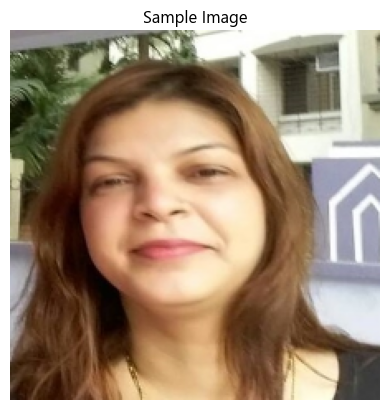

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
Prediction for 'sample/174.jpg': Without Mask ❌


In [36]:
show_and_predict('sample/174.jpg')

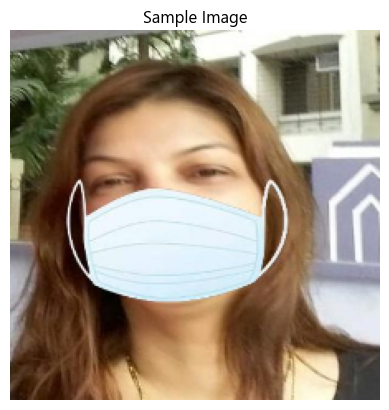

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
Prediction for 'sample/174-with-mask.jpg': With Mask 😷


In [37]:
show_and_predict('sample/174-with-mask.jpg')

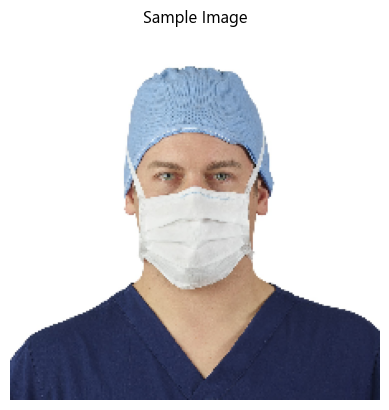

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
Prediction for 'sample/1lvl-1-surgical-mask-white-41805-front-copy.jpg': With Mask 😷


In [38]:
show_and_predict('sample/1lvl-1-surgical-mask-white-41805-front-copy.jpg')